# Week 8 Lab

## Swiss Rolls and SVCs

Start by loading a couple toolkits and packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold, datasets, svm

Next, load the Swirl.npy data. Assess the dimension of the data as well

In [3]:
Swirl = np.load('Swirl.npy')

# Find the shape or dimension of the Swirl data here
Swirl.shape

(1000, 3)

In [45]:
Swirl[:10]

array([[ 11.2571812 ,  19.94995263,  -4.70550699],
       [  4.07074127,   9.46271869,  -3.67968275],
       [  8.24596862,  17.69269767,  -8.30125505],
       [  5.65683332,   4.53284949,  -1.8565368 ],
       [ -8.7277554 ,  20.96932118,   2.6834318 ],
       [ 12.57598152,   4.48448205,   1.99009937],
       [  6.20452341,   4.6463612 ,  -0.84022765],
       [  5.02721238,   2.13107252,   4.9522205 ],
       [  6.41559693,  13.98039456,   1.20172862],
       [  6.48169874,   9.91310374,  -9.52764085]])

Based on the dimensions of Swirl, we are going to plot the data in 3D. I'll be using the Axes3D toolkit for this.

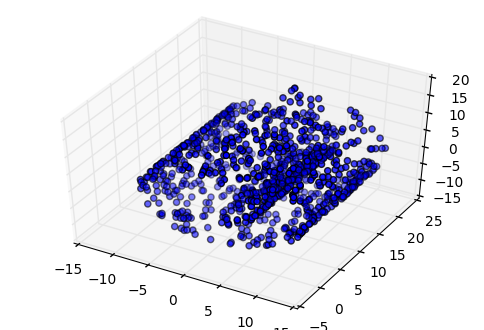

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#play around with viewing in 3D
ax.view_init(45,-60)

ax.scatter(Swirl[:,0],Swirl[:,1],Swirl[:,2], c = 'b', marker='o')

plt.show()

The initial viewing projection for our plot was [15,-75]. Try a few other orientations to get an idea for the shape of the data.

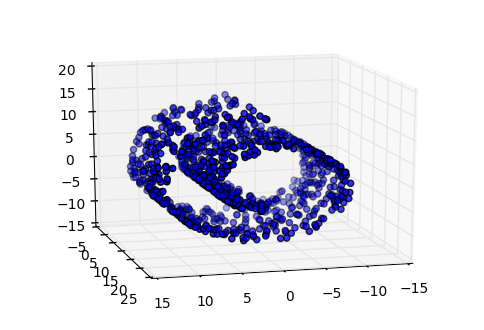

In [14]:
# Do a few plots using different ax.view_init() values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(15,75)
ax.scatter(Swirl[:,0],Swirl[:,1],Swirl[:,2], c = 'b', marker='o')
plt.show()

# Bonus (1 pt.): Write a for loop that automatically plots ten different projections from (0,0) to (90,-90) in one figure

I've also included an array that designates the type of each point. Go ahead and load 'Point_ID.npy' as an array 'point_id' below. 
What are the dimensions of 'point_id' ?
How many different *types* of points are there in 'point_id' ? [hint: numpy.unique]

In [18]:
# code for loading point_id
point_id = np.load('Point_ID.npy')
# code for finding dimensions of point_id
# number of types in point_id
point_id.shape


(1000,)

Now we are going to graph our Swirl data according to the point IDs.

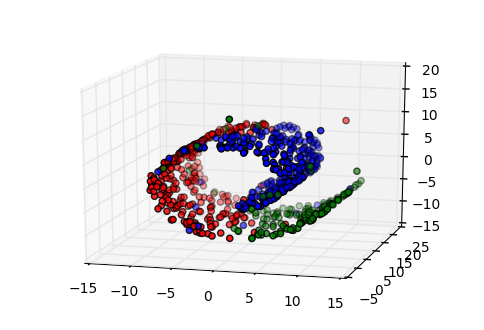

In [19]:
# sit back and enjoy

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#play around with viewing in 3D
ax.view_init(15, -75)
color = ['r','b','g','c','m','k']
for i in np.arange(1,len(np.unique(point_id))):
    ax.scatter(Swirl[point_id==i,0],Swirl[point_id==i,1],Swirl[point_id==i,2], c=color[i-1], marker='o')

plt.show()

We are now going to use an amazing little function from scikit learn called SVC. SVC stands for Support Vector Classification. This function takes a data set and applies Support Vector Machine discrimination on high dimensional data. But our first step is to make a set of training data and test data.

In [20]:
# first it is a good idea to test if the length of the coordinate data is the same as the length of the 
## ID data
len(point_id)==len(Swirl)


True

In [28]:
# For my training data, I want a set of indices randomly selected from 0 to 1000, non-inclusive.
# I'll make my training data 90% of the total data set.
train_ind = np.random.choice(np.arange(0,len(point_id)), size=(len(point_id)*0.9), replace=False, p=None)

# check train_ind to make sure it is the proper length and contains no repeats [hint: use set() and a Boolean]

print train_ind.shape, len(train_ind) == len(set(train_ind)) # if True no duplicates

## Extra make function called checkDups(array1, array2), return found duplicates or "No duplicates"

(900,) True


/Users/jasonfontana/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


Now you need to make an array of test indices (call is "test_ind") that don't overlap with the training indices. 
hint: numpy.delete

In [41]:
# test_ind code here
#test_id = np.delete(point_id, train_ind)
#test_id.shape

test_ind = np.array([])

for i in np.arange(0,len(point_id)):
    if i not in train_ind:
        test_ind = np.append(test_ind, i)
test_ind.shape

(100,)

We are now going to use the SVC function to try to classify out training data

In [81]:
from sklearn.svm import SVC
identify = SVC()

### These complain about having floats instead of integers
#y_test = Swirl[test_ind, :]
#y_test = np.take(point_id, test_ind_int)

def filterArray(X, ind):
    output = np.array([])
    for i in ind:
        output = np.append(output, X[i])
    return output

def filterMatrix(X, ind):
    output = np.array([])
    for i in ind:
        if output.size == 0:
            output = np.array(X[i])
        else:
            output = np.vstack([output, X[i]])
    return output    

    
y_test = filterArray(point_id, test_ind)
y_train = filterArray(point_id, train_ind)
  
X_test = filterMatrix(Swirl, test_ind)
X_train = filterMatrix(Swirl, train_ind)


identify.fit(X_train, y_train) # hint: *training data* <= Swirl[train_ind,:]

predicted = identify.predict(X_test)

/Users/jasonfontana/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jasonfontana/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jasonfontana/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [82]:
# What proportion of the predicted IDs was correct?
np.mean(predicted == y_test)

0.95999999999999996

In [83]:
predicted = identify.predict(X_train)
np.mean(predicted == y_train)

0.93999999999999995

Compare your predicted IDs to the actual IDs
How accurate was this method?

Bonus (1 pt.): Graph the entire data set. Plot training data in grey, accurate predictions in green, and erroneous predictions in red